In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-01 17:45:36.102546: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 17:45:36.102653: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 17:45:36.234971: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Define constants
image_size = (128, 128)  # Adjust the size based on your dataset
batch_size = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/bone-fracture-dataset/BoneFractureDataset/training',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/bone-fracture-dataset/BoneFractureDataset/testing',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [3]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
# Train the model with early stopping
history = model.fit(
    train_generator,  
    validation_data=test_generator, 
    epochs=10, 
   )

Epoch 1/10


I0000 00:00:1711993559.593936     110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


277/277 [==============================] - 78s 260ms/step - loss: 0.6457 - accuracy: 0.6132 - val_loss: 0.9797 - val_accuracy: 0.6117
Epoch 2/10
277/277 [==============================] - 44s 160ms/step - loss: 0.6249 - accuracy: 0.7149 - val_loss: 11.2249 - val_accuracy: 0.7717
Epoch 3/10
277/277 [==============================] - 45s 163ms/step - loss: 1.8109 - accuracy: 0.7794 - val_loss: 8.2171 - val_accuracy: 0.5867
Epoch 4/10
277/277 [==============================] - 45s 162ms/step - loss: 1.1580 - accuracy: 0.7627 - val_loss: 4.7311 - val_accuracy: 0.7133
Epoch 5/10
277/277 [==============================] - 45s 162ms/step - loss: 0.9574 - accuracy: 0.8320 - val_loss: 3.3713 - val_accuracy: 0.6483
Epoch 6/10
277/277 [==============================] - 45s 164ms/step - loss: 0.6272 - accuracy: 0.8585 - val_loss: 1.2598 - val_accuracy: 0.6383
Epoch 7/10
277/277 [==============================] - 46s 165ms/step - loss: 0.3419 - accuracy: 0.8823 - val_loss: 1.6873 - val_accuracy: 0.

In [12]:
# Evaluate the model
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

19/19 [==============================] - 1s 64ms/step - loss: 1.2357 - accuracy: 0.7917
Test Accuracy: 79.17%


In [13]:
# Make predictions on new data
predictions = model.predict(test_generator)

19/19 [==============================] - 1s 60ms/step


In [15]:
# Convert predictions to binary labels
predicted_labels = (predictions > 0.5).astype(int)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[222 138]
 [152  88]]


In [17]:
# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=['not_fractured', 'fractured'])
print("Classification Report:")
print(class_report)

Classification Report:
               precision    recall  f1-score   support

not_fractured       0.59      0.62      0.60       360
    fractured       0.39      0.37      0.38       240

     accuracy                           0.52       600
    macro avg       0.49      0.49      0.49       600
 weighted avg       0.51      0.52      0.51       600



1/1 [==============================] - 0s 20ms/step


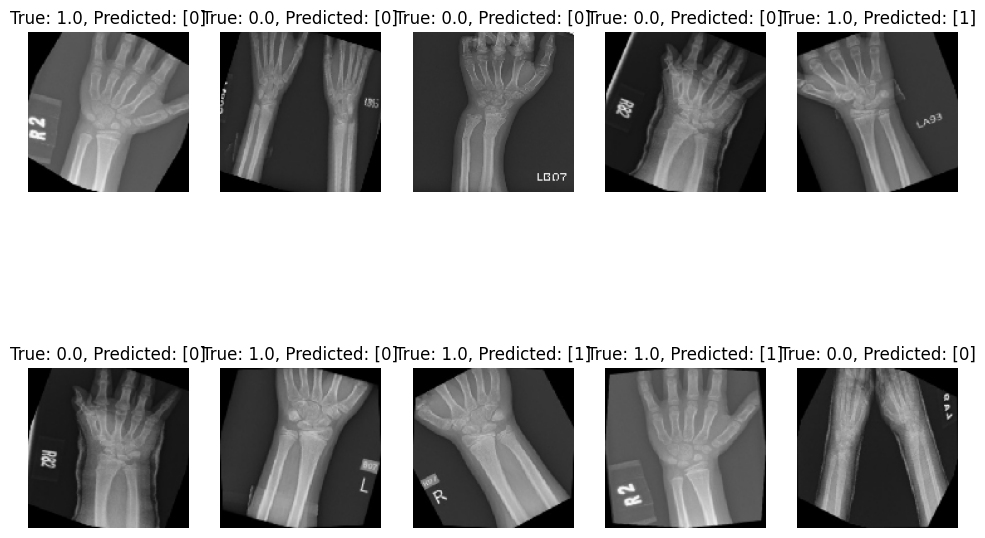

In [18]:
import matplotlib.pyplot as plt
import random

# Visualize random predictions
test_images, true_labels = next(test_generator)
predicted_labels = (model.predict(test_images) > 0.5).astype(int)

# Plot some sample images with true and predicted labels
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()